In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers , models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_test.shape

(10000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# convert into 1-D array

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [9]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

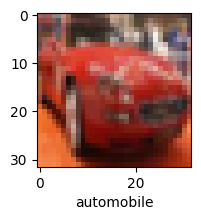

In [12]:
plot_sample(X_train, y_train , 5)

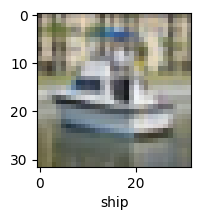

In [13]:
plot_sample(X_train, y_train , 501)

In [15]:
# Scale down
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')

])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train , epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8155 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6263 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5440 - accuracy: 0.4541
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4853 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4345 - accuracy: 0.4962


In [17]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = ann.predict(X_test)
y_pred_clasess = [np.argmax(element) for element in y_pred]

print('classification_report: \n', classification_report(y_test, y_pred_clasess))
import warnings
warnings.filterwarnings('ignore')

313/313 [==============================] - 1s 3ms/step
classification_report: 
               precision    recall  f1-score   support

           0       0.65      0.34      0.45      1000
           1       0.54      0.69      0.61      1000
           2       0.29      0.54      0.38      1000
           3       0.39      0.27      0.32      1000
           4       0.41      0.42      0.42      1000
           5       0.57      0.21      0.30      1000
           6       0.44      0.65      0.53      1000
           7       0.61      0.49      0.54      1000
           8       0.72      0.49      0.58      1000
           9       0.49      0.63      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [18]:
import seaborn as sns

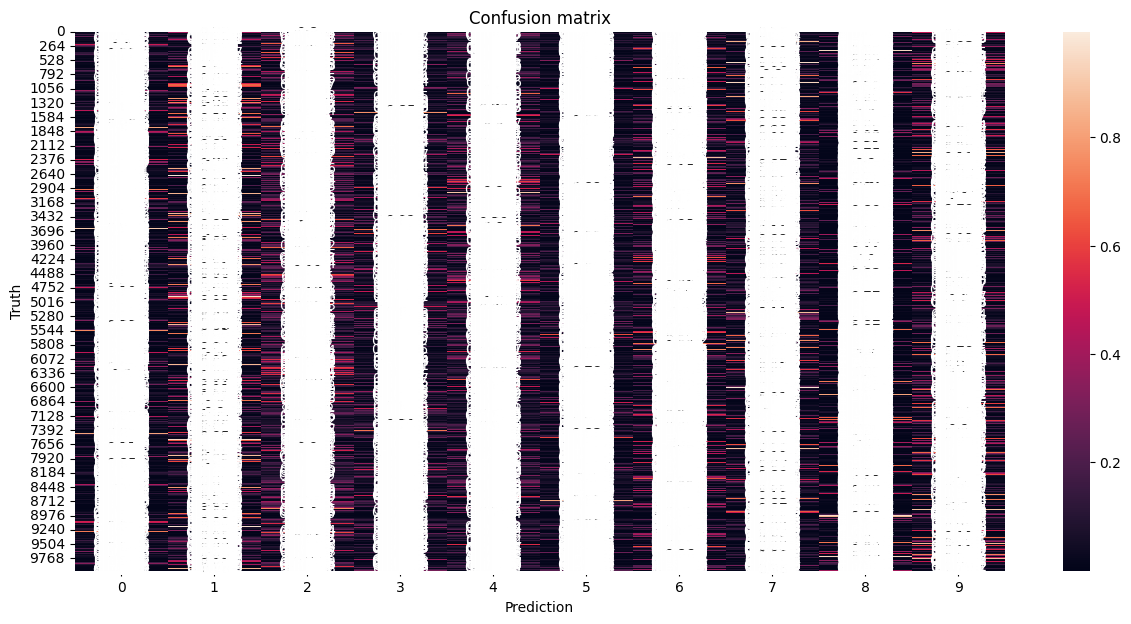

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show()

In [20]:
# CNN Model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [21]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4625 - accuracy: 0.4744
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1121 - accuracy: 0.6105
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9860 - accuracy: 0.6566
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9024 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8374 - accuracy: 0.7101
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7896 - accuracy: 0.7245
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7430 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6996 - accuracy: 0.7576
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6567 - accuracy: 0.7711
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.62

In [23]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9270 - accuracy: 0.6916


[0.9270369410514832, 0.6916000247001648]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 4ms/step


array([[3.97863565e-03, 6.82958285e-04, 1.21041145e-02, 8.14164281e-01,
        7.91726125e-05, 3.20749059e-02, 3.55927683e-02, 7.82376155e-05,
        9.86834839e-02, 2.56136223e-03],
       [7.90247170e-04, 4.07688133e-03, 3.72170859e-07, 8.37385628e-08,
        9.08636810e-09, 1.75348056e-10, 1.56025104e-09, 3.15764859e-09,
        9.95125711e-01, 6.73687873e-06],
       [5.65286987e-02, 1.21926926e-01, 2.28705714e-04, 1.93364685e-03,
        1.63715752e-03, 1.88133199e-04, 5.34536593e-05, 2.13061017e-03,
        7.88711250e-01, 2.66614556e-02],
       [6.54328704e-01, 1.86032653e-02, 8.09941813e-03, 1.09083171e-03,
        1.38596236e-03, 6.55652912e-05, 6.32288720e-05, 8.14634332e-05,
        3.16161752e-01, 1.19776487e-04],
       [1.19053539e-06, 2.53965118e-06, 1.01196636e-02, 2.29216833e-03,
        9.01065469e-01, 3.87500710e-04, 8.61242563e-02, 3.53362520e-06,
        2.94962319e-06, 7.29697263e-07]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

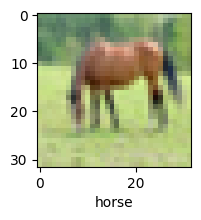

In [26]:
plot_sample(X_test , y_test, 60)

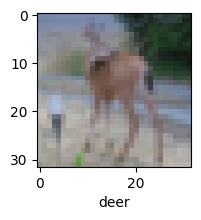

In [27]:
plot_sample(X_test, y_test,100)

In [28]:
classes[y_classes[60]]

'horse'